In [107]:
import gc
import time
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
import xgboost as xgb 
from xgboost import plot_importance
import matplotlib.pyplot as plt

In [108]:
is_valid = False

In [109]:
def timefuture(df):
    df['datetime']= pd.to_datetime(df['click_time'])
    df['dow'] = df['datetime'].dt.dayofweek
    df['doy'] = df['datetime'].dt.dayofyear
    df.drop(['datetime', 'click_time'], axis=1, inplace=True)
    return df
def timeFeatures(df):
    # Make some new features with click_time column
    df['datetime'] = pd.to_datetime(df['click_time'].values)
    df['dow']      = df['datetime'].dt.dayofweek
    df["doy"]      = df["datetime"].dt.dayofyear
    #df["dteom"]    = df["datetime"].dt.daysinmonth - df["datetime"].dt.day
    df.drop(['datetime', 'click_time'], axis=1, inplace=True)
    return df

In [110]:
# start_time = time.time()

In [111]:
train_columns = ['ip', 'app', 'device', 'os', 'channel', 'click_time', 'is_attributed']
test_columns = ['ip', 'app', 'device', 'os', 'channel', 'click_time', 'click_id']
dtypes = {
    'ip': 'uint32',
    'app': 'uint16',
    'device': 'uint16',
    'os': 'uint16',
    'channel': 'uint16',
    'is_attributed': 'uint8',
    'click_id': 'uint32',
}

In [112]:
train = pd.read_csv('mnt/ssd/kaggle-talkingdata2/competition_files/train.csv', skiprows=range(1,123903891), nrows=1100000, usecols=train_columns, dtype=dtypes)

In [113]:
test = pd.read_csv('test_supplement.csv', usecols=test_columns, dtype=dtypes,nrows=1100000)
test.head()

,click_id,ip,app,device,os,channel,click_time
0,0,43570,3,1,18,379,2017-11-09 14:23:39
1,1,80528,3,1,13,379,2017-11-09 14:23:51
2,2,32323,3,1,13,379,2017-11-09 14:25:57
3,3,42887,3,1,17,379,2017-11-09 14:26:03
4,4,119289,58,1,30,120,2017-11-09 14:26:41


In [114]:
train.head()

,ip,app,device,os,channel,click_time,is_attributed
0,210014,9,1,13,334,2017-11-08 16:41:52,0
1,2076,3,1,32,211,2017-11-08 16:41:52,0
2,296481,9,1,19,232,2017-11-08 16:41:52,0
3,33473,15,1,13,245,2017-11-08 16:41:52,0
4,115014,3,1,13,137,2017-11-08 16:41:52,0


In [115]:
y = train['is_attributed']

In [116]:
train.drop(['is_attributed'], axis=1, inplace=True)

In [117]:
sub = pd.DataFrame()
test.drop(['click_id'], axis=1, inplace=True)
# gc.collect()

In [118]:
gc.collect?

In [119]:
nrow_train = train.shape[0]
nrow_train

1100000

In [120]:
merge = pd.concat([train, test])
merge

,ip,app,device,os,channel,click_time
0,210014,9,1,13,334,2017-11-08 16:41:52
1,2076,3,1,32,211,2017-11-08 16:41:52
2,296481,9,1,19,232,2017-11-08 16:41:52
3,33473,15,1,13,245,2017-11-08 16:41:52
4,115014,3,1,13,137,2017-11-08 16:41:52
5,51675,3,1,15,173,2017-11-08 16:41:52
6,27090,3,2,9,280,2017-11-08 16:41:52
7,109145,12,1,23,245,2017-11-08 16:41:52
8,49602,3,1,19,137,2017-11-08 16:41:52
9,24932,15,1,19,245,2017-11-08 16:41:52


In [121]:
del train, test

In [122]:
gc.collect

<function gc.collect>

In [123]:
ip_count = merge.groupby(['ip'])['channel'].count().reset_index()
ip_count

,ip,channel
0,6,9
1,9,45
2,10,6
3,19,1
4,20,7
5,25,6
6,27,5
7,29,3
8,30,3
9,31,1


In [124]:
ip_count = ip_count.rename(columns={'channel':'clicks_by_ip'})

In [125]:
ip_count.head()

,ip,clicks_by_ip
0,6,9
1,9,45
2,10,6
3,19,1
4,20,7


In [126]:
merge = pd.merge(merge, ip_count, on='ip', how='left', sort=False)
merge.head(10)

,ip,app,device,os,channel,click_time,clicks_by_ip
0,210014,9,1,13,334,2017-11-08 16:41:52,5
1,2076,3,1,32,211,2017-11-08 16:41:52,964
2,296481,9,1,19,232,2017-11-08 16:41:52,11
3,33473,15,1,13,245,2017-11-08 16:41:52,19
4,115014,3,1,13,137,2017-11-08 16:41:52,27
5,51675,3,1,15,173,2017-11-08 16:41:52,155
6,27090,3,2,9,280,2017-11-08 16:41:52,182
7,109145,12,1,23,245,2017-11-08 16:41:52,12
8,49602,3,1,19,137,2017-11-08 16:41:52,3135
9,24932,15,1,19,245,2017-11-08 16:41:52,793


In [127]:
merge['clicks_by_ip'] = merge['clicks_by_ip'].astype('uint16')
# merge.drop(['ip'], axis=1, inplace=True)
merge.head()

,ip,app,device,os,channel,click_time,clicks_by_ip
0,210014,9,1,13,334,2017-11-08 16:41:52,5
1,2076,3,1,32,211,2017-11-08 16:41:52,964
2,296481,9,1,19,232,2017-11-08 16:41:52,11
3,33473,15,1,13,245,2017-11-08 16:41:52,19
4,115014,3,1,13,137,2017-11-08 16:41:52,27


In [128]:
train = merge[:nrow_train]
test = merge[nrow_train:]
train.head()

,ip,app,device,os,channel,click_time,clicks_by_ip
0,210014,9,1,13,334,2017-11-08 16:41:52,5
1,2076,3,1,32,211,2017-11-08 16:41:52,964
2,296481,9,1,19,232,2017-11-08 16:41:52,11
3,33473,15,1,13,245,2017-11-08 16:41:52,19
4,115014,3,1,13,137,2017-11-08 16:41:52,27


In [129]:
train = timeFeatures(train)
train.head()

f:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
f:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
f:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

,ip,app,device,os,channel,clicks_by_ip,dow,doy
0,210014,9,1,13,334,5,2,312
1,2076,3,1,32,211,964,2,312
2,296481,9,1,19,232,11,2,312
3,33473,15,1,13,245,19,2,312
4,115014,3,1,13,137,27,2,312


In [130]:
params = {'eta': 0.3,
          'tree_method': "hist",
          'grow_policy': "lossguide",
          'max_leaves': 1400,  
          'max_depth': 0, 
          'subsample': 0.9, 
          'colsample_bytree': 0.7, 
          'colsample_bylevel':0.7,
          'min_child_weight':0,
          'alpha':4,
          'objective': 'binary:logistic', 
          'scale_pos_weight':9,
          'eval_metric': 'auc', 
          'nthread':8,
          'random_state': 99, 
          'silent': True}

In [131]:
# if (is_valid == True):
train_x, train_y, test_x, test_y = train_test_split(train, y, test_size=0.1, random_state=99)
dtrain = xgb.DMatrix(train_x, test_x)
dvalid = xgb.DMatrix(train_y, test_y)
del train_x, train_y, test_x, test_y
gc.collect
#     watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
model = xgb.train(params, dtrain, 200, watchlist ,maximize=True, early_stopping_rounds=25, verbose_eval=5)
# else:
#     dtrain = xgb.DMatrix(train, y)
#     watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
#     model = xgb.train(params, dtrain, 30, watchlist, maximize=True, verbose_eval=1)

[0]	train-auc:0.910444	valid-auc:0.897662
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 25 rounds.
[5]	train-auc:0.950708	valid-auc:0.942525
[10]	train-auc:0.967495	valid-auc:0.946452
[15]	train-auc:0.987173	valid-auc:0.947908
[20]	train-auc:0.998786	valid-auc:0.947043
[25]	train-auc:0.99956	valid-auc:0.945321
[30]	train-auc:0.999648	valid-auc:0.945649
[35]	train-auc:0.999704	valid-auc:0.946379
[40]	train-auc:0.999731	valid-auc:0.94754
Stopping. Best iteration:
[18]	train-auc:0.997474	valid-auc:0.949695



In [132]:
# else:
#     dtrain = xgb.DMatrix(train, y)
#     watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
#     model = xgb.train(params, dtrain, 30, watchlist, maximize=True, verbose_eval=1)

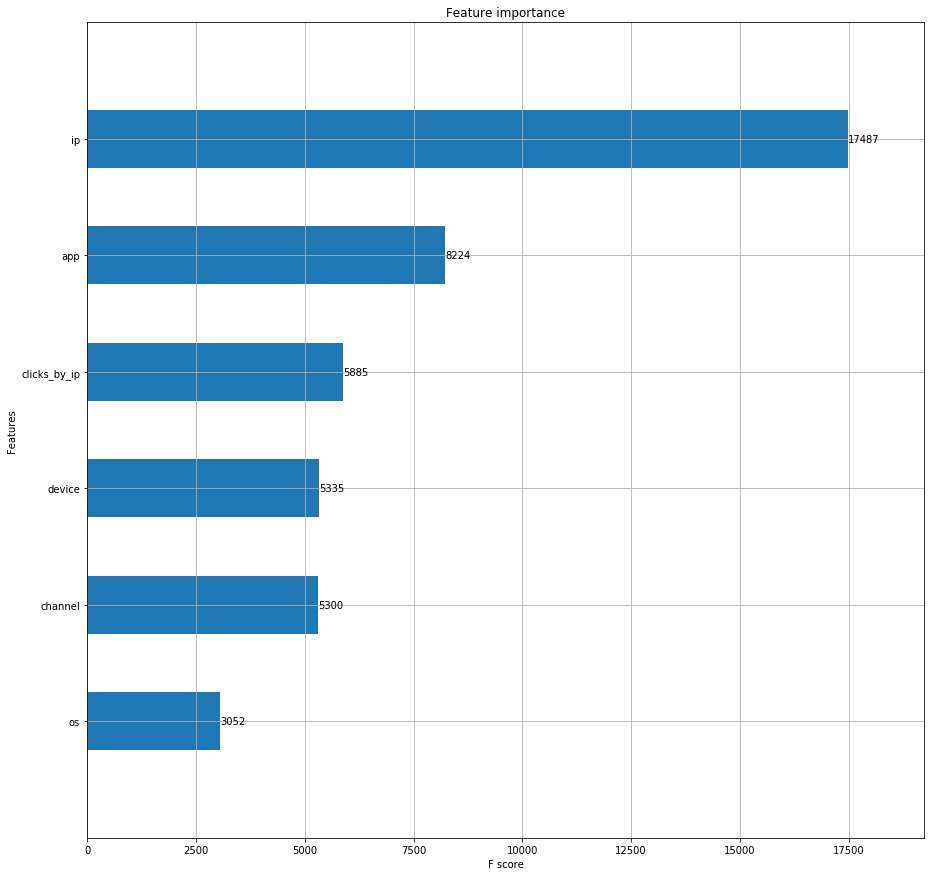

In [133]:
fig, ax = plt.subplots(figsize=(15,15))
plot_importance(model, 
               height=0.5,
               ax=ax,
               max_num_features=8)
plt.gcf().savefig('feature_importance_xgb.png')

In [146]:
# test = pd.read_csv('test.csv',encoding='utf-8', usecols=test_columns, dtype=dtypes,engine='python')
test = pd.read_csv("test.csv", usecols=test_columns, nrows=1000000, dtype=dtypes)
test = pd.merge(test, ip_count, on='ip', how='left', sort=False)
sub['click_id'] = test['click_id'].astype('int')
# test.dropna()
# test['clicks_by_ip'] = test['clicks_by_ip'].astype('uint16')
# test = timeFeatures(test)

In [147]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
click_id        1000000 non-null uint32
ip              1000000 non-null uint32
app             1000000 non-null uint16
device          1000000 non-null uint16
os              1000000 non-null uint16
channel         1000000 non-null uint16
click_time      1000000 non-null object
clicks_by_ip    923735 non-null float64
dtypes: float64(1), object(1), uint16(4), uint32(2)
memory usage: 38.1+ MB


In [148]:
test.head()

,click_id,ip,app,device,os,channel,click_time,clicks_by_ip
0,0,5744,9,1,3,107,2017-11-10 04:00:00,3.0
1,1,119901,9,1,3,466,2017-11-10 04:00:00,288.0
2,2,72287,21,1,19,128,2017-11-10 04:00:00,267.0
3,3,78477,15,1,13,111,2017-11-10 04:00:00,60.0
4,4,123080,12,1,13,328,2017-11-10 04:00:00,4.0


In [149]:
# test['clicks_by_ip'] = test['clicks_by_ip'].astype('uint32')
test.dropna()
test['clicks_by_ip'] = test['clicks_by_ip'].fillna(0).astype('uint16')

In [150]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
click_id        1000000 non-null uint32
ip              1000000 non-null uint32
app             1000000 non-null uint16
device          1000000 non-null uint16
os              1000000 non-null uint16
channel         1000000 non-null uint16
click_time      1000000 non-null object
clicks_by_ip    1000000 non-null uint16
dtypes: object(1), uint16(5), uint32(2)
memory usage: 32.4+ MB


In [151]:
test['click_time'].values

array(['2017-11-10 04:00:00', '2017-11-10 04:00:00',
       '2017-11-10 04:00:00', ..., '2017-11-10 04:17:35',
       '2017-11-10 04:17:35', '2017-11-10 04:17:35'], dtype=object)

In [154]:
test = timeFeatures(test)
test = test.drop(['click_id','ip'], axis=1, inplace=True)
dtest = xgb.DMatrix(test)
print(type)

TypeError: 'NoneType' object is not subscriptable